In [18]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

def classify_leaf_image(img_path):
    # Paths
    model_path = "/content/drive/MyDrive/nnminipro1_7species/nnproject1_results/autoencoder_model_mbmu.h5"
    save_path = "/content/drive/MyDrive/nnminipro1_7species/nnproject1_results/bonus_results"
    os.makedirs(save_path, exist_ok=True)

    # Load model for inference only — skip compiling metrics like 'mse'
    autoencoder = load_model(model_path, compile=False)

    # Load & preprocess image
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    image_resized = cv2.resize(image, (256, 256))
    image_thresh = cv2.adaptiveThreshold(
        image_resized, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY, 11, 2
    )
    image_thresh = image_thresh.astype('float32') / 255.0
    image_input = np.expand_dims(image_thresh, axis=(0, -1))  # Shape: (1, 256, 256, 1)

    # Inference
    reconstructed = autoencoder.predict(image_input)
    mse = np.mean((image_input - reconstructed) ** 2)

    # Classification based on threshold
    threshold = 0.0225  # Based on test set performance
    pred_class = 0 if mse <= threshold else 1
    label = "MBMU Leaf (Class 0)" if pred_class == 0 else "Non-MBMU Leaf (Class 1)"
    print(f"\nReconstruction MSE: {mse:.6f}")
    print("Predicted Class:", pred_class, "-", label)

    # Visualization & save
    plt.figure(figsize=(6, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(image_input.squeeze(), cmap='gray')
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed.squeeze(), cmap='gray')
    plt.title("Reconstructed")
    plt.axis("off")

    # Save result image
    result_name = f"bonus_result_class{pred_class}_mse{mse:.4f}.png"
    save_file = os.path.join(save_path, result_name)
    plt.savefig(save_file, bbox_inches='tight')
    plt.show()

    print(f"Reconstruction saved to: {save_file}")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step

Reconstruction MSE: 0.022684
Predicted Class: 1 - Non-MBMU Leaf (Class 1)


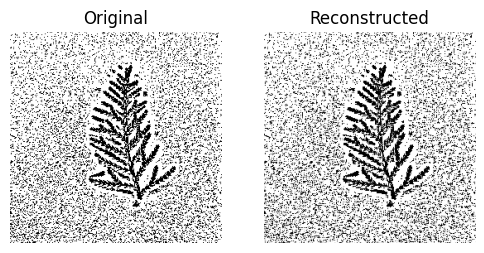

Reconstruction saved to: /content/drive/MyDrive/nnminipro1_7species/nnproject1_results/bonus_results/bonus_result_class1_mse0.0227.png


In [19]:
classify_leaf_image("/content/drive/MyDrive/NNminiProject_1/christ_2.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step

Reconstruction MSE: 0.012555
Predicted Class: 0 - MBMU Leaf (Class 0)


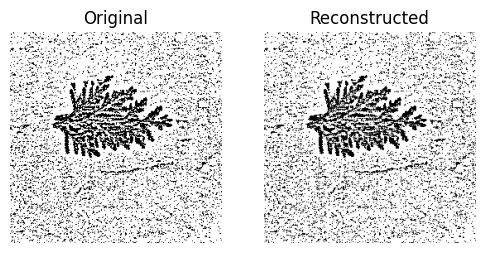

Reconstruction saved to: /content/drive/MyDrive/nnminipro1_7species/nnproject1_results/bonus_results/bonus_result_class0_mse0.0126.png


In [20]:
classify_leaf_image("/content/drive/MyDrive/NNminiProject_1/christ_leaf.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step

Reconstruction MSE: 0.037696
Predicted Class: 1 - Non-MBMU Leaf (Class 1)


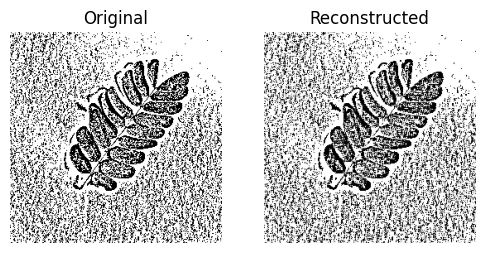

Reconstruction saved to: /content/drive/MyDrive/nnminipro1_7species/nnproject1_results/bonus_results/bonus_result_class1_mse0.0377.png


In [21]:
classify_leaf_image("/content/drive/MyDrive/NNminiProject_1/gulmo2.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step

Reconstruction MSE: 0.022381
Predicted Class: 0 - MBMU Leaf (Class 0)


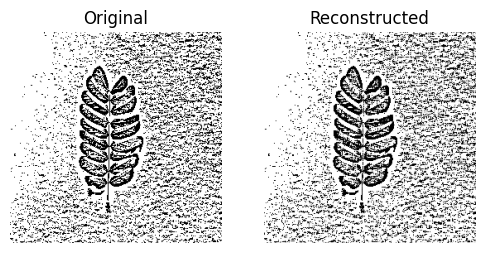

Reconstruction saved to: /content/drive/MyDrive/nnminipro1_7species/nnproject1_results/bonus_results/bonus_result_class0_mse0.0224.png


In [22]:
classify_leaf_image("/content/drive/MyDrive/NNminiProject_1/gulmo3.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step

Reconstruction MSE: 0.016319
Predicted Class: 0 - MBMU Leaf (Class 0)


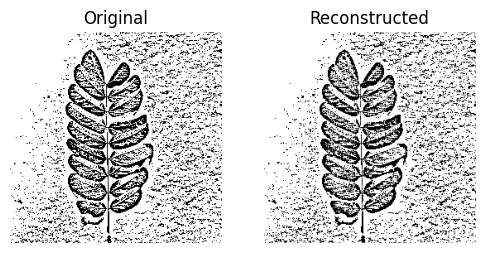

Reconstruction saved to: /content/drive/MyDrive/nnminipro1_7species/nnproject1_results/bonus_results/bonus_result_class0_mse0.0163.png


In [23]:
classify_leaf_image("/content/drive/MyDrive/NNminiProject_1/gulmo4.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step

Reconstruction MSE: 0.029509
Predicted Class: 1 - Non-MBMU Leaf (Class 1)


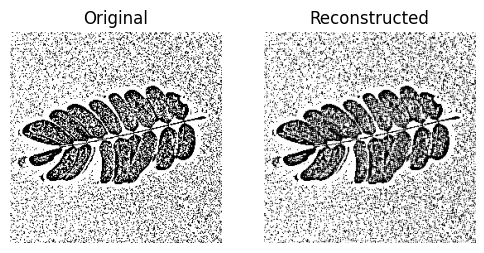

Reconstruction saved to: /content/drive/MyDrive/nnminipro1_7species/nnproject1_results/bonus_results/bonus_result_class1_mse0.0295.png


In [24]:
classify_leaf_image("/content/drive/MyDrive/NNminiProject_1/gulmohar_leaf_1.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step

Reconstruction MSE: 0.023595
Predicted Class: 1 - Non-MBMU Leaf (Class 1)


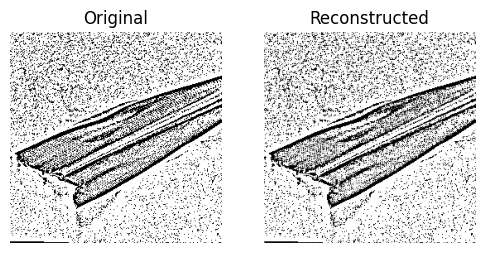

Reconstruction saved to: /content/drive/MyDrive/nnminipro1_7species/nnproject1_results/bonus_results/bonus_result_class1_mse0.0236.png


In [25]:
classify_leaf_image("/content/drive/MyDrive/NNminiProject_1/lily_leaf1.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step

Reconstruction MSE: 0.011237
Predicted Class: 0 - MBMU Leaf (Class 0)


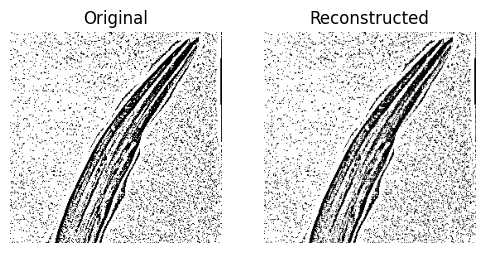

Reconstruction saved to: /content/drive/MyDrive/nnminipro1_7species/nnproject1_results/bonus_results/bonus_result_class0_mse0.0112.png


In [26]:
classify_leaf_image("/content/drive/MyDrive/NNminiProject_1/lily_leaf2.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step

Reconstruction MSE: 0.002649
Predicted Class: 0 - MBMU Leaf (Class 0)


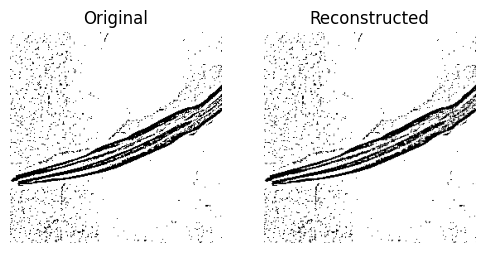

Reconstruction saved to: /content/drive/MyDrive/nnminipro1_7species/nnproject1_results/bonus_results/bonus_result_class0_mse0.0026.png


In [27]:
classify_leaf_image("/content/drive/MyDrive/NNminiProject_1/lily_leaf3.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step

Reconstruction MSE: 0.003825
Predicted Class: 0 - MBMU Leaf (Class 0)


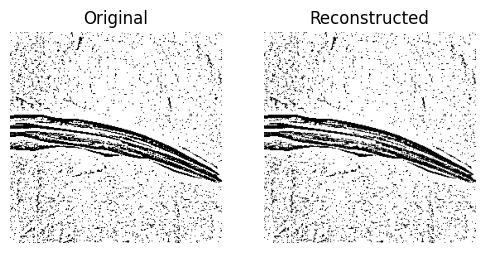

Reconstruction saved to: /content/drive/MyDrive/nnminipro1_7species/nnproject1_results/bonus_results/bonus_result_class0_mse0.0038.png


In [28]:
classify_leaf_image("/content/drive/MyDrive/NNminiProject_1/lily_leaf4.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step

Reconstruction MSE: 0.008712
Predicted Class: 0 - MBMU Leaf (Class 0)


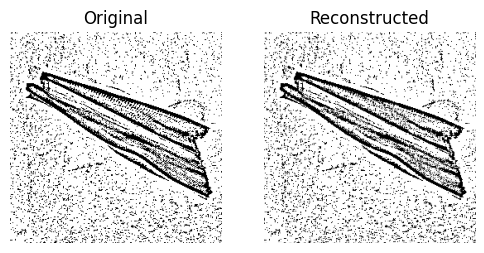

Reconstruction saved to: /content/drive/MyDrive/nnminipro1_7species/nnproject1_results/bonus_results/bonus_result_class0_mse0.0087.png


In [29]:
classify_leaf_image("/content/drive/MyDrive/NNminiProject_1/lily_leaf5.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step

Reconstruction MSE: 0.028377
Predicted Class: 1 - Non-MBMU Leaf (Class 1)


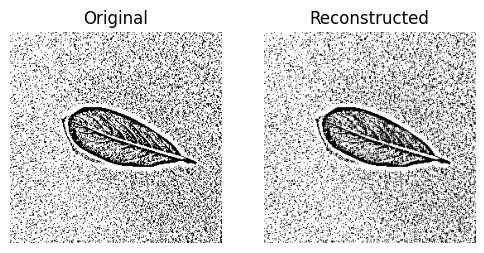

Reconstruction saved to: /content/drive/MyDrive/nnminipro1_7species/nnproject1_results/bonus_results/bonus_result_class1_mse0.0284.png


In [30]:
classify_leaf_image("/content/drive/MyDrive/NNminiProject_1/mada_leaf_1.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step

Reconstruction MSE: 0.005943
Predicted Class: 0 - MBMU Leaf (Class 0)


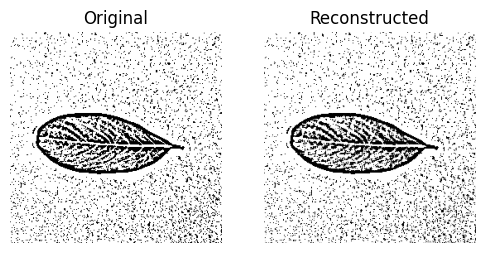

Reconstruction saved to: /content/drive/MyDrive/nnminipro1_7species/nnproject1_results/bonus_results/bonus_result_class0_mse0.0059.png


In [31]:
classify_leaf_image("/content/drive/MyDrive/NNminiProject_1/mada_leaf_2.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step

Reconstruction MSE: 0.055391
Predicted Class: 1 - Non-MBMU Leaf (Class 1)


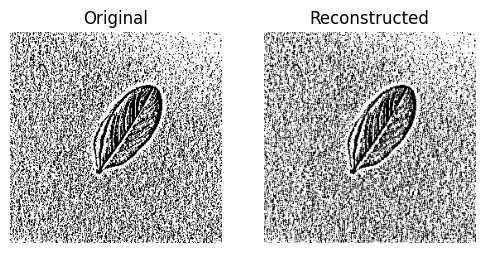

Reconstruction saved to: /content/drive/MyDrive/nnminipro1_7species/nnproject1_results/bonus_results/bonus_result_class1_mse0.0554.png


In [32]:
classify_leaf_image("/content/drive/MyDrive/NNminiProject_1/mada_leaf3.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step

Reconstruction MSE: 0.048526
Predicted Class: 1 - Non-MBMU Leaf (Class 1)


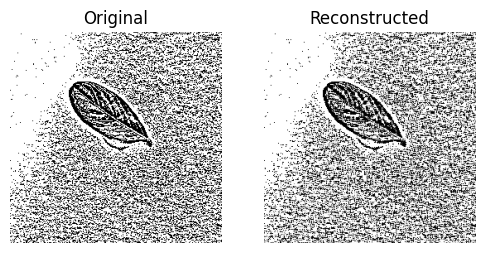

Reconstruction saved to: /content/drive/MyDrive/nnminipro1_7species/nnproject1_results/bonus_results/bonus_result_class1_mse0.0485.png


In [33]:
classify_leaf_image("/content/drive/MyDrive/NNminiProject_1/mada_leaf4.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step

Reconstruction MSE: 0.031952
Predicted Class: 1 - Non-MBMU Leaf (Class 1)


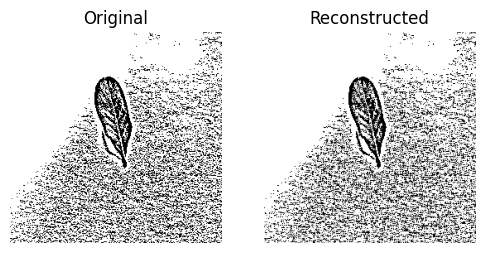

Reconstruction saved to: /content/drive/MyDrive/nnminipro1_7species/nnproject1_results/bonus_results/bonus_result_class1_mse0.0320.png


In [34]:
classify_leaf_image("/content/drive/MyDrive/NNminiProject_1/mada_leaf5.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step

Reconstruction MSE: 0.014639
Predicted Class: 0 - MBMU Leaf (Class 0)


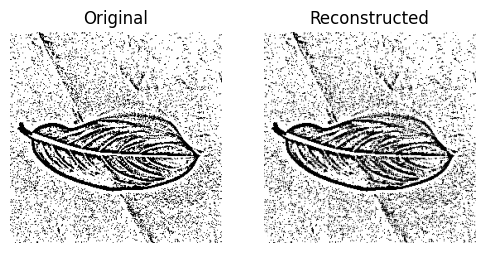

Reconstruction saved to: /content/drive/MyDrive/nnminipro1_7species/nnproject1_results/bonus_results/bonus_result_class0_mse0.0146.png


In [35]:
classify_leaf_image("/content/drive/MyDrive/NNminiProject_1/Madagascar(2).jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step

Reconstruction MSE: 0.024562
Predicted Class: 1 - Non-MBMU Leaf (Class 1)


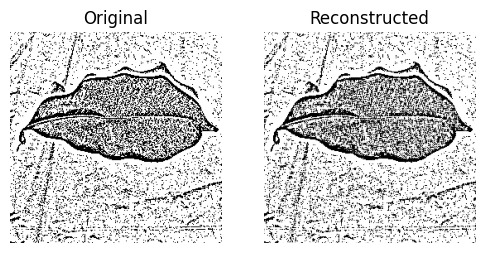

Reconstruction saved to: /content/drive/MyDrive/nnminipro1_7species/nnproject1_results/bonus_results/bonus_result_class1_mse0.0246.png


In [36]:
classify_leaf_image("/content/drive/MyDrive/NNminiProject_1/mango_leaf_test.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step

Reconstruction MSE: 0.035997
Predicted Class: 1 - Non-MBMU Leaf (Class 1)


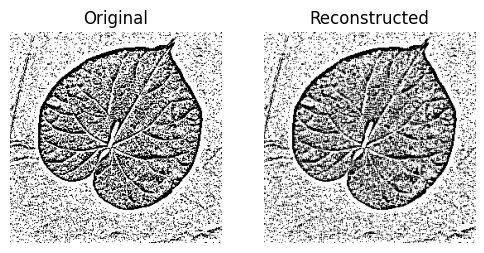

Reconstruction saved to: /content/drive/MyDrive/nnminipro1_7species/nnproject1_results/bonus_results/bonus_result_class1_mse0.0360.png


In [37]:
classify_leaf_image("/content/drive/MyDrive/NNminiProject_1/money_leaf2.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step

Reconstruction MSE: 0.006959
Predicted Class: 0 - MBMU Leaf (Class 0)


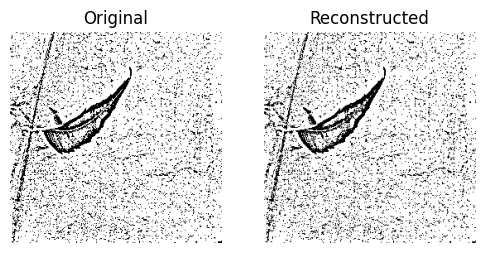

Reconstruction saved to: /content/drive/MyDrive/nnminipro1_7species/nnproject1_results/bonus_results/bonus_result_class0_mse0.0070.png


In [39]:
classify_leaf_image("/content/drive/MyDrive/NNminiProject_1/neem_leaf_test.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step

Reconstruction MSE: 0.057308
Predicted Class: 1 - Non-MBMU Leaf (Class 1)


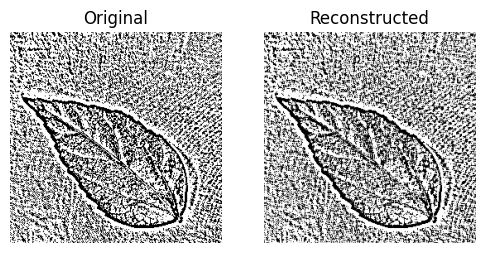

Reconstruction saved to: /content/drive/MyDrive/nnminipro1_7species/nnproject1_results/bonus_results/bonus_result_class1_mse0.0573.png


In [40]:
classify_leaf_image("/content/drive/MyDrive/NNminiProject_1/new_leaf.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step

Reconstruction MSE: 0.012823
Predicted Class: 0 - MBMU Leaf (Class 0)


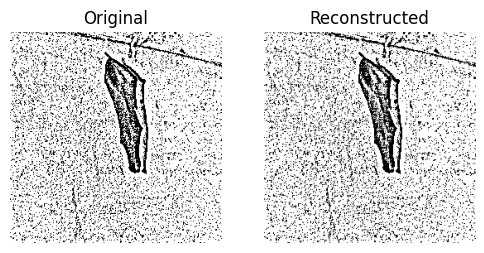

Reconstruction saved to: /content/drive/MyDrive/nnminipro1_7species/nnproject1_results/bonus_results/bonus_result_class0_mse0.0128.png


In [41]:
classify_leaf_image("/content/drive/MyDrive/NNminiProject_1/New_leaf2.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step

Reconstruction MSE: 0.035478
Predicted Class: 1 - Non-MBMU Leaf (Class 1)


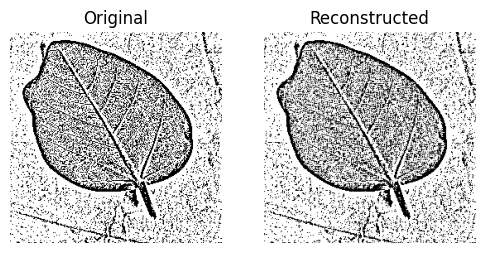

Reconstruction saved to: /content/drive/MyDrive/nnminipro1_7species/nnproject1_results/bonus_results/bonus_result_class1_mse0.0355.png


In [42]:
classify_leaf_image("/content/drive/MyDrive/NNminiProject_1/new_leaf3.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step

Reconstruction MSE: 0.019017
Predicted Class: 0 - MBMU Leaf (Class 0)


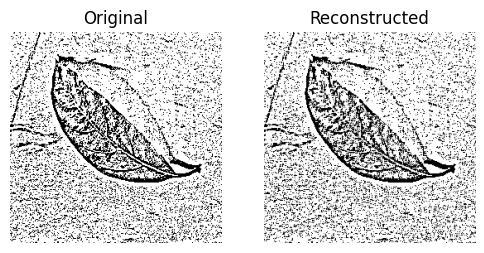

Reconstruction saved to: /content/drive/MyDrive/nnminipro1_7species/nnproject1_results/bonus_results/bonus_result_class0_mse0.0190.png


In [43]:
classify_leaf_image("/content/drive/MyDrive/NNminiProject_1/new_leaf4.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step

Reconstruction MSE: 0.020533
Predicted Class: 0 - MBMU Leaf (Class 0)


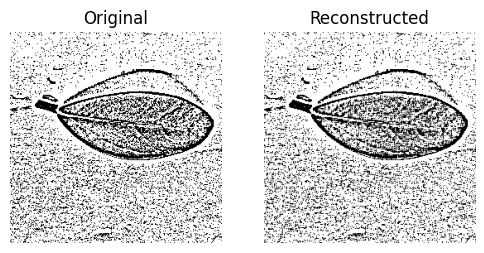

Reconstruction saved to: /content/drive/MyDrive/nnminipro1_7species/nnproject1_results/bonus_results/bonus_result_class0_mse0.0205.png


In [44]:
classify_leaf_image("/content/drive/MyDrive/NNminiProject_1/new_leaf5.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step

Reconstruction MSE: 0.038073
Predicted Class: 1 - Non-MBMU Leaf (Class 1)


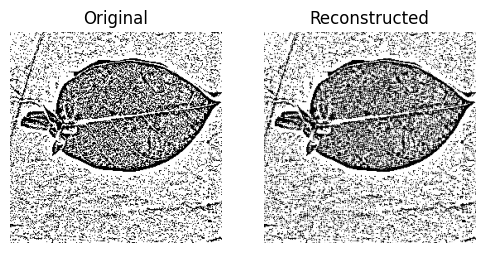

Reconstruction saved to: /content/drive/MyDrive/nnminipro1_7species/nnproject1_results/bonus_results/bonus_result_class1_mse0.0381.png


In [45]:
classify_leaf_image("/content/drive/MyDrive/NNminiProject_1/new_leaf6.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step

Reconstruction MSE: 0.030555
Predicted Class: 1 - Non-MBMU Leaf (Class 1)


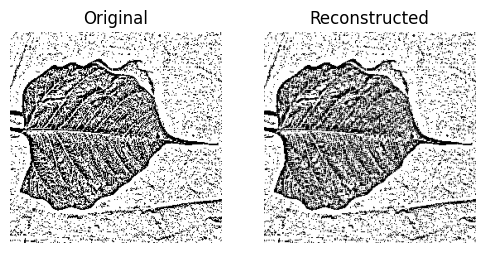

Reconstruction saved to: /content/drive/MyDrive/nnminipro1_7species/nnproject1_results/bonus_results/bonus_result_class1_mse0.0306.png


In [46]:
classify_leaf_image("/content/drive/MyDrive/NNminiProject_1/new_leaf7.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step

Reconstruction MSE: 0.009738
Predicted Class: 0 - MBMU Leaf (Class 0)


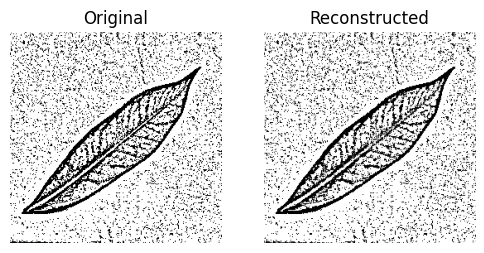

Reconstruction saved to: /content/drive/MyDrive/nnminipro1_7species/nnproject1_results/bonus_results/bonus_result_class0_mse0.0097.png


In [47]:
classify_leaf_image("/content/drive/MyDrive/NNminiProject_1/NNpro1_jamun_test.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step

Reconstruction MSE: 0.023045
Predicted Class: 1 - Non-MBMU Leaf (Class 1)


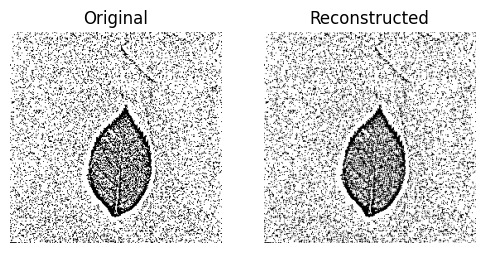

Reconstruction saved to: /content/drive/MyDrive/nnminipro1_7species/nnproject1_results/bonus_results/bonus_result_class1_mse0.0230.png


In [48]:
classify_leaf_image("/content/drive/MyDrive/NNminiProject_1/NNpro1_rose_test.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step

Reconstruction MSE: 0.018657
Predicted Class: 0 - MBMU Leaf (Class 0)


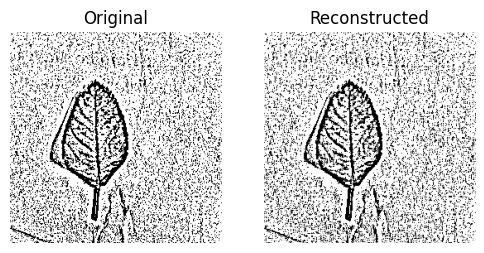

Reconstruction saved to: /content/drive/MyDrive/nnminipro1_7species/nnproject1_results/bonus_results/bonus_result_class0_mse0.0187.png


In [49]:
classify_leaf_image("/content/drive/MyDrive/NNminiProject_1/rose_2.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step

Reconstruction MSE: 0.014874
Predicted Class: 0 - MBMU Leaf (Class 0)


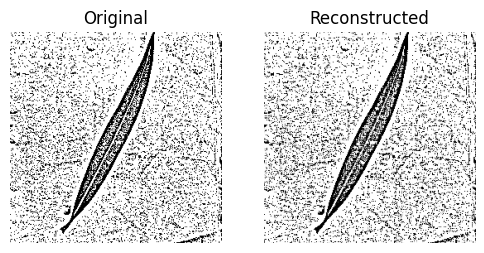

Reconstruction saved to: /content/drive/MyDrive/nnminipro1_7species/nnproject1_results/bonus_results/bonus_result_class0_mse0.0149.png


In [51]:
classify_leaf_image("/content/drive/MyDrive/NNminiProject_1/kaner_leaf.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step

Reconstruction MSE: 0.009828
Predicted Class: 0 - MBMU Leaf (Class 0)


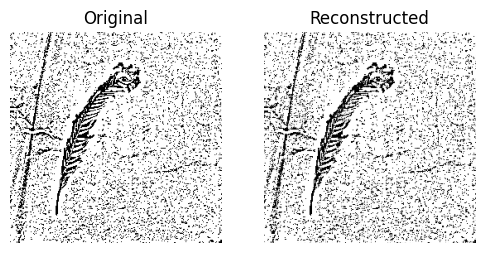

Reconstruction saved to: /content/drive/MyDrive/nnminipro1_7species/nnproject1_results/bonus_results/bonus_result_class0_mse0.0098.png


In [53]:
classify_leaf_image("/content/drive/MyDrive/NNminiProject_1/Khe_leaf.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step

Reconstruction MSE: 0.026968
Predicted Class: 1 - Non-MBMU Leaf (Class 1)


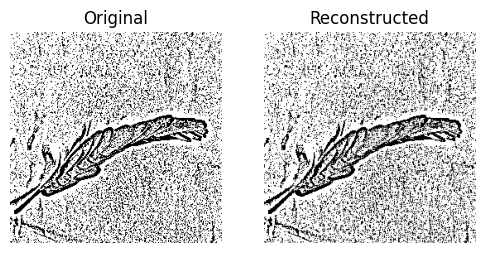

Reconstruction saved to: /content/drive/MyDrive/nnminipro1_7species/nnproject1_results/bonus_results/bonus_result_class1_mse0.0270.png


In [54]:
classify_leaf_image("/content/drive/MyDrive/NNminiProject_1/khe2.jpg")